# Regression analyisis
In statistical modeling, regression analysis is a set of statistical processes for estimating the relationships between a dependent variable (often called the 'outcome' or 'response' variable) and one or more independent variables (often called 'predictors', 'covariates', 'explanatory variables' or 'features'). The most common form of regression analysis is linear regression, in which one finds the line (or a more complex linear combination) that most closely fits the data according to a specific mathematical criterion. For example, the method of ordinary least squares computes the unique line (or hyperplane) that minimizes the sum of squared differences between the true data and that line (or hyperplane). For specific mathematical reasons (see linear regression), this allows the researcher to estimate the conditional expectation (or population average value) of the dependent variable when the independent variables take on a given set of values. Less common forms of regression use slightly different procedures to estimate alternative location parameters (e.g., quantile regression or Necessary Condition Analysis) or estimate the conditional expectation across a broader collection of non-linear models (e.g., nonparametric regression).

In [142]:
#importing the required modules
import seaborn as sns
from IPython.display import display, HTML
import matplotlib.pyplot as plt
import scipy.stats as stats
import pandas as pd
import numpy as np
import seaborn as sns

# ttest and euclidean distance
from scipy.stats import ttest_ind
from scipy.spatial.distance import seuclidean

# linear fit using statsmodels
import statsmodels.api as sm
import statsmodels.formula.api as smf

# good ole sklearn
from sklearn.metrics import euclidean_distances, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split, cross_val_predict, KFold
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression

Loading the data

In [83]:


# Small adjustments to default style of plots, making sure it's readable and colorblind-friendly everywhere
plt.style.use('seaborn-colorblind')
plt.rcParams.update({'font.size' : 12.5,
                     'figure.figsize':(10,7)})

#copy the path of the sample quotes: (to big to put in the git)
#ALEX: 'C:/Users/alexb/Documents/Ecole/EPFL/MasterII/ADA/'
#JULES: ...
#MARIN: ...
#NICO: ...


path_2_data = 'C:/Users/alexb/Documents/Ecole/EPFL/MasterII/ADA/'


#import the dataset sample
df = pd.read_json(path_2_data + 'polUS_quotes_speakers_merged.json.bz2',compression="bz2",lines=True)
df2 = pd.read_json(path_2_data + 'Speakers_aggregation.json.bz2',compression="bz2",lines=True)
df3 = pd.read_json(path_2_data + 'df_LR_small_sample.json.bz2',compression="bz2",lines=True)



In [86]:
df3



quoteID                                          quotation  \
0      2015-08-19-053089  It's a rotten process, it's a defiled process,...   
1      2015-06-19-007527  By the very definition of the word, this proce...   
2      2015-08-15-072111  Why? If I was allowed to have both hands on th...   
3      2017-06-24-036281  It's not that hard of a reach to say this law ...   
4      2019-04-30-050786                   Is there a moat, a barge system?   
...                  ...                                                ...   
39415  2020-01-01-004623  But the university has clearly played a major ...   
39416  2020-01-09-030077  I don't want us to micromanage, which aldermen...   
39417  2020-01-15-064058  Our local businesses are the backbone of our e...   
39418  2020-03-11-056561  The Board of Freeholders and I would like to t...   
39419  2020-01-31-098765  This is my backyard. And my water. I don't wan...   

                speaker qid_unique                date  \
0            Evan Jenne   Q5415439 2015-08-19 22:03:58   
1            Evan Jenne   Q5415439 2015-06-19 01:08:41   
2            Evan Jenne   Q5415439 2015-08-15 16:21:15   
3            Evan Jenne   Q5415439 2017-06-24 10:30:23   
4            Evan Jenne   Q5415439 2019-04-30 00:00:00   
...                 ...        ...                 ...   
39415        Paul Jadin   Q3371510 2020-01-01 10:00:00   
39416    Harry Osterman   Q5671406 2020-01-09 22:18:05   
39417   Cynthia Thielen   Q5200162 2020-01-15 22:09:20   
39418  Lillian G. Burry   Q6548117 2020-03-11 14:00:29   
39419    Glenn Anderson   Q5568669 2020-01-31 00:00:00   

                                                    urls      p1      p2  \
0      [http://www.washingtontimes.com/news/2015/aug/...  0.8643  0.1327   
1      [http://www.news4jax.com/politics/in-final-hou...  0.8724  0.1276   
2      [http://web.tampabay.com/news/politics/statero...  0.8298  0.1702   
3      [http://www2.tbo.com/news/florida/on-open-reco...  0.8540  0.1360   
4      [http://floridapolitics.com/archives/295137-ho...  0.7546  0.2036   
...                                                  ...     ...     ...   
39415  [https://washingtonmonthly.com/2020/01/01/how-...  0.7710  0.2093   
39416  [http://chicagotonight.wttw.com/2020/01/09/cit...  0.7330  0.2298   
39417  [https://www.kitv.com/story/41569110/after-30-...  0.7223  0.2777   
39418  [https://centraljersey.com/2020/03/11/monmouth...  0.6541  0.3460   
39419  [http://wdio.com/TWIM/iron-range-copper-nickel...  0.8146  0.1804   

       delta_p  year  ...  US_congress_bio_ID occupation     party  \
0       0.7316  2015  ...                None   [Q82955]  [Q29552]   
1       0.7448  2015  ...                None   [Q82955]  [Q29552]   
2       0.6596  2015  ...                None   [Q82955]  [Q29552]   
3       0.7180  2017  ...                None   [Q82955]  [Q29552]   
4       0.5510  2019  ...                None   [Q82955]  [Q29552]   
...        ...   ...  ...                 ...        ...       ...   
39415   0.5617  2020  ...                None   [Q82955]      None   
39416   0.5032  2020  ...                None   [Q82955]  [Q29552]   
39417   0.4446  2020  ...                None   [Q82955]  [Q29468]   
39418   0.3081  2020  ...                None   [Q82955]  [Q29468]   
39419   0.6342  2020  ...                None   [Q82955]  [Q29468]   

       academic_degree        id candidacy  type religion   age    bi_party  
0                 None  Q5415439      None  item     None  44.0    Democrat  
1                 None  Q5415439      None  item     None  44.0    Democrat  
2                 None  Q5415439      None  item     None  44.0    Democrat  
3                 None  Q5415439      None  item     None  44.0    Democrat  
4                 None  Q5415439      None  item     None  44.0    Democrat  
...                ...       ...       ...   ...      ...   ...         ...  
39415             None  Q3371510      None  item     None  66.0        

In [ ]:
df2

## Zipf
Zipf's law is most easily observed by plotting the data on a log-log graph, with the axes being log (rank order) and log (frequency). For example, the word "the" (as described above) would appear at x = log(1), y = log(#number of word). It is also possible to plot reciprocal rank against frequency or reciprocal frequency or interword interval against rank. The data conform to Zipf's law to the extent that the plot is linear.



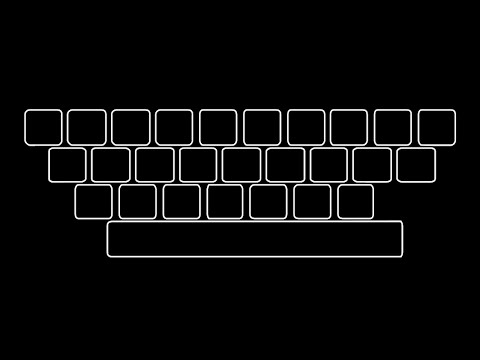

In [4]:
from IPython.lib.display import YouTubeVideo
YouTubeVideo('fCn8zs912OE')

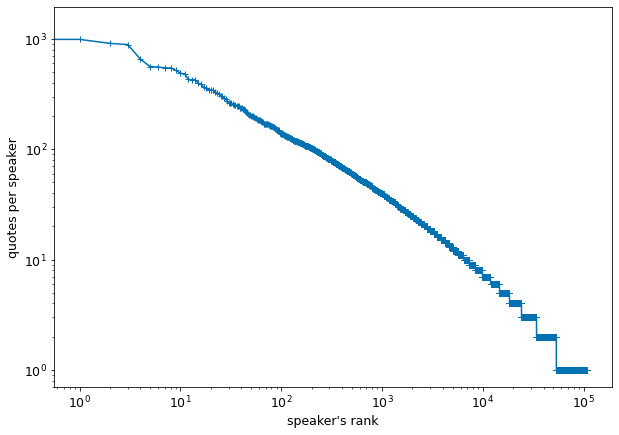

In [5]:
fig,ax = plt.subplots()

ax = df2['quotes_number'].plot(loglog=True, legend=False,marker = '+', ylabel = "quotes per speaker", xlabel="speaker's rank");



To insert in our DataStory maybe it could be coooool.

In [6]:
df_lookup = pd.read_csv('wikidata_labels_descriptions_quotebank.csv.bz2',compression = 'bz2',index_col='QID')

In [87]:
df3

quoteID                                          quotation  \
0      2015-08-19-053089  It's a rotten process, it's a defiled process,...   
1      2015-06-19-007527  By the very definition of the word, this proce...   
2      2015-08-15-072111  Why? If I was allowed to have both hands on th...   
3      2017-06-24-036281  It's not that hard of a reach to say this law ...   
4      2019-04-30-050786                   Is there a moat, a barge system?   
...                  ...                                                ...   
39415  2020-01-01-004623  But the university has clearly played a major ...   
39416  2020-01-09-030077  I don't want us to micromanage, which aldermen...   
39417  2020-01-15-064058  Our local businesses are the backbone of our e...   
39418  2020-03-11-056561  The Board of Freeholders and I would like to t...   
39419  2020-01-31-098765  This is my backyard. And my water. I don't wan...   

                speaker qid_unique                date  \
0            Evan Jenne   Q5415439 2015-08-19 22:03:58   
1            Evan Jenne   Q5415439 2015-06-19 01:08:41   
2            Evan Jenne   Q5415439 2015-08-15 16:21:15   
3            Evan Jenne   Q5415439 2017-06-24 10:30:23   
4            Evan Jenne   Q5415439 2019-04-30 00:00:00   
...                 ...        ...                 ...   
39415        Paul Jadin   Q3371510 2020-01-01 10:00:00   
39416    Harry Osterman   Q5671406 2020-01-09 22:18:05   
39417   Cynthia Thielen   Q5200162 2020-01-15 22:09:20   
39418  Lillian G. Burry   Q6548117 2020-03-11 14:00:29   
39419    Glenn Anderson   Q5568669 2020-01-31 00:00:00   

                                                    urls      p1      p2  \
0      [http://www.washingtontimes.com/news/2015/aug/...  0.8643  0.1327   
1      [http://www.news4jax.com/politics/in-final-hou...  0.8724  0.1276   
2      [http://web.tampabay.com/news/politics/statero...  0.8298  0.1702   
3      [http://www2.tbo.com/news/florida/on-open-reco...  0.8540  0.1360   
4      [http://floridapolitics.com/archives/295137-ho...  0.7546  0.2036   
...                                                  ...     ...     ...   
39415  [https://washingtonmonthly.com/2020/01/01/how-...  0.7710  0.2093   
39416  [http://chicagotonight.wttw.com/2020/01/09/cit...  0.7330  0.2298   
39417  [https://www.kitv.com/story/41569110/after-30-...  0.7223  0.2777   
39418  [https://centraljersey.com/2020/03/11/monmouth...  0.6541  0.3460   
39419  [http://wdio.com/TWIM/iron-range-copper-nickel...  0.8146  0.1804   

       delta_p  year  ...  US_congress_bio_ID occupation     party  \
0       0.7316  2015  ...                None   [Q82955]  [Q29552]   
1       0.7448  2015  ...                None   [Q82955]  [Q29552]   
2       0.6596  2015  ...                None   [Q82955]  [Q29552]   
3       0.7180  2017  ...                None   [Q82955]  [Q29552]   
4       0.5510  2019  ...                None   [Q82955]  [Q29552]   
...        ...   ...  ...                 ...        ...       ...   
39415   0.5617  2020  ...                None   [Q82955]      None   
39416   0.5032  2020  ...                None   [Q82955]  [Q29552]   
39417   0.4446  2020  ...                None   [Q82955]  [Q29468]   
39418   0.3081  2020  ...                None   [Q82955]  [Q29468]   
39419   0.6342  2020  ...                None   [Q82955]  [Q29468]   

       academic_degree        id candidacy  type religion   age    bi_party  
0                 None  Q5415439      None  item     None  44.0    Democrat  
1                 None  Q5415439      None  item     None  44.0    Democrat  
2                 None  Q5415439      None  item     None  44.0    Democrat  
3                 None  Q5415439      None  item     None  44.0    Democrat  
4                 None  Q5415439      None  item     None  44.0    Democrat  
...                ...       ...       ...   ...      ...   ...         ...  
39415             None  Q3371510      None  item     None  66.0        

In [95]:
df_pre_reg = df2[['quotes_number','gender','fraction']]
df_pre_reg2 = df3[['bi_party','gender','colloquial','age']]

In [96]:
df_pre_reg = df_pre_reg.replace(to_replace='None', value=np.nan).dropna()
print(len(df_pre_reg))
df_pre_reg2 = df_pre_reg2.replace(to_replace = 'None', value=np.nan).dropna()
print(len(df_pre_reg2))

104817
35667


In [97]:
#df_pre_reg = df2[['quotes_number','gender','fraction']]
#df_pre_reg = df_pre_reg.replace(to_replace='None', value=np.nan).dropna()

df_pre_reg['gender_all'] = df_pre_reg['gender'].apply(lambda x: x[0]) 
#index_genre = df_pre_reg[df_pre_reg["gender_all"].str.contains("Q1052281|Q1097630||Q12964198|Q15145778|Q15145779|Q18116794|Q2449503|Q27679766|Q48270|Q48279")].index

#"Q1052281|Q1097630||Q12964198|Q15145778|Q15145779|Q18116794|Q2449503|Q27679766|Q48270|Q48279"
#'Q6581072|Q6581097'
index1 = df_pre_reg.index[(df_pre_reg["gender_all"].str.contains('Q1052281'))]
index2 = df_pre_reg.index[(df_pre_reg["gender_all"].str.contains('Q48279'))]
index3 = df_pre_reg.index[(df_pre_reg["gender_all"].str.contains('Q48270'))]
index4 = df_pre_reg.index[(df_pre_reg["gender_all"].str.contains('Q27679766'))]
index5 = df_pre_reg.index[(df_pre_reg["gender_all"].str.contains('Q18116794'))]
index6 = df_pre_reg.index[(df_pre_reg["gender_all"].str.contains('Q15145779'))]
index7 = df_pre_reg.index[(df_pre_reg["gender_all"].str.contains('Q15145778'))]
index8 = df_pre_reg.index[(df_pre_reg["gender_all"].str.contains('Q12964198'))]
index9 = df_pre_reg.index[(df_pre_reg["gender_all"].str.contains('Q1097630'))]
index10 = df_pre_reg.index[(df_pre_reg["gender_all"].str.contains('Q2449503'))]


df_pre_reg = df_pre_reg.drop(index1)
df_pre_reg = df_pre_reg.drop(index2)
df_pre_reg = df_pre_reg.drop(index3)
df_pre_reg = df_pre_reg.drop(index4)
df_pre_reg = df_pre_reg.drop(index5)
df_pre_reg = df_pre_reg.drop(index6)
df_pre_reg = df_pre_reg.drop(index7)
df_pre_reg = df_pre_reg.drop(index8)
df_pre_reg = df_pre_reg.drop(index9)
df_pre_reg = df_pre_reg.drop(index10)


In [98]:
#df_pre_reg2 = df3[['quotes_number','gender','fraction']]
#df_pre_reg2 = df_pre_reg2.replace(to_replace='None', value=np.nan).dropna()

df_pre_reg2['gender_all'] = df_pre_reg2['gender'].apply(lambda x: x[0]) 
#index_genre = df_pre_reg2[df_pre_reg2["gender_all"].str.contains("Q1052281|Q1097630||Q12964198|Q15145778|Q15145779|Q18116794|Q2449503|Q27679766|Q48270|Q48279")].index

#"Q1052281|Q1097630||Q12964198|Q15145778|Q15145779|Q18116794|Q2449503|Q27679766|Q48270|Q48279"
#'Q6581072|Q6581097'
index1 = df_pre_reg2.index[(df_pre_reg2["gender_all"].str.contains('Q1052281'))]
index2 = df_pre_reg2.index[(df_pre_reg2["gender_all"].str.contains('Q48279'))]
index3 = df_pre_reg2.index[(df_pre_reg2["gender_all"].str.contains('Q48270'))]
index4 = df_pre_reg2.index[(df_pre_reg2["gender_all"].str.contains('Q27679766'))]
index5 = df_pre_reg2.index[(df_pre_reg2["gender_all"].str.contains('Q18116794'))]
index6 = df_pre_reg2.index[(df_pre_reg2["gender_all"].str.contains('Q15145779'))]
index7 = df_pre_reg2.index[(df_pre_reg2["gender_all"].str.contains('Q15145778'))]
index8 = df_pre_reg2.index[(df_pre_reg2["gender_all"].str.contains('Q12964198'))]
index9 = df_pre_reg2.index[(df_pre_reg2["gender_all"].str.contains('Q1097630'))]
index10 = df_pre_reg2.index[(df_pre_reg2["gender_all"].str.contains('Q2449503'))]


df_pre_reg2 = df_pre_reg2.drop(index1)
df_pre_reg2 = df_pre_reg2.drop(index2)
df_pre_reg2 = df_pre_reg2.drop(index3)
df_pre_reg2 = df_pre_reg2.drop(index4)
df_pre_reg2 = df_pre_reg2.drop(index5)
df_pre_reg2 = df_pre_reg2.drop(index6)
df_pre_reg2 = df_pre_reg2.drop(index7)
df_pre_reg2 = df_pre_reg2.drop(index8)
df_pre_reg2 = df_pre_reg2.drop(index9)
df_pre_reg2 = df_pre_reg2.drop(index10)


In [99]:
df_pre_reg['gender'] = df_pre_reg['gender'].apply(lambda x: x[0])
df_pre_reg.drop('gender_all', axis=1, inplace=True)
df_pre_reg['Index'] = df_pre_reg.index
df_pre_reg

df_pre_reg2['gender'] = df_pre_reg2['gender'].apply(lambda x: x[0])
df_pre_reg2.drop('gender_all', axis=1, inplace=True)
df_pre_reg2['Index'] = df_pre_reg2.index
df_pre_reg2


bi_party    gender  colloquial   age  Index
0        Democrat  Q6581097           0  44.0      0
1        Democrat  Q6581097           0  44.0      1
2        Democrat  Q6581097           0  44.0      2
3        Democrat  Q6581097           0  44.0      3
4        Democrat  Q6581097           1  44.0      4
...           ...       ...         ...   ...    ...
39412  Republican  Q6581072           0  98.0  39412
39413    Democrat  Q6581097           0  78.0  39413
39416    Democrat  Q6581097           0  54.0  39416
39417  Republican  Q6581072           1  88.0  39417
39419  Republican  Q6581097           0  63.0  39419

[35664 rows x 5 columns]

In [115]:
df3

quoteID                                          quotation  \
0      2015-08-19-053089  It's a rotten process, it's a defiled process,...   
1      2015-06-19-007527  By the very definition of the word, this proce...   
2      2015-08-15-072111  Why? If I was allowed to have both hands on th...   
3      2017-06-24-036281  It's not that hard of a reach to say this law ...   
4      2019-04-30-050786                   Is there a moat, a barge system?   
...                  ...                                                ...   
39415  2020-01-01-004623  But the university has clearly played a major ...   
39416  2020-01-09-030077  I don't want us to micromanage, which aldermen...   
39417  2020-01-15-064058  Our local businesses are the backbone of our e...   
39418  2020-03-11-056561  The Board of Freeholders and I would like to t...   
39419  2020-01-31-098765  This is my backyard. And my water. I don't wan...   

                speaker qid_unique                date  \
0            Evan Jenne   Q5415439 2015-08-19 22:03:58   
1            Evan Jenne   Q5415439 2015-06-19 01:08:41   
2            Evan Jenne   Q5415439 2015-08-15 16:21:15   
3            Evan Jenne   Q5415439 2017-06-24 10:30:23   
4            Evan Jenne   Q5415439 2019-04-30 00:00:00   
...                 ...        ...                 ...   
39415        Paul Jadin   Q3371510 2020-01-01 10:00:00   
39416    Harry Osterman   Q5671406 2020-01-09 22:18:05   
39417   Cynthia Thielen   Q5200162 2020-01-15 22:09:20   
39418  Lillian G. Burry   Q6548117 2020-03-11 14:00:29   
39419    Glenn Anderson   Q5568669 2020-01-31 00:00:00   

                                                    urls      p1      p2  \
0      [http://www.washingtontimes.com/news/2015/aug/...  0.8643  0.1327   
1      [http://www.news4jax.com/politics/in-final-hou...  0.8724  0.1276   
2      [http://web.tampabay.com/news/politics/statero...  0.8298  0.1702   
3      [http://www2.tbo.com/news/florida/on-open-reco...  0.8540  0.1360   
4      [http://floridapolitics.com/archives/295137-ho...  0.7546  0.2036   
...                                                  ...     ...     ...   
39415  [https://washingtonmonthly.com/2020/01/01/how-...  0.7710  0.2093   
39416  [http://chicagotonight.wttw.com/2020/01/09/cit...  0.7330  0.2298   
39417  [https://www.kitv.com/story/41569110/after-30-...  0.7223  0.2777   
39418  [https://centraljersey.com/2020/03/11/monmouth...  0.6541  0.3460   
39419  [http://wdio.com/TWIM/iron-range-copper-nickel...  0.8146  0.1804   

       delta_p  year  ...  US_congress_bio_ID occupation     party  \
0       0.7316  2015  ...                None   [Q82955]  [Q29552]   
1       0.7448  2015  ...                None   [Q82955]  [Q29552]   
2       0.6596  2015  ...                None   [Q82955]  [Q29552]   
3       0.7180  2017  ...                None   [Q82955]  [Q29552]   
4       0.5510  2019  ...                None   [Q82955]  [Q29552]   
...        ...   ...  ...                 ...        ...       ...   
39415   0.5617  2020  ...                None   [Q82955]      None   
39416   0.5032  2020  ...                None   [Q82955]  [Q29552]   
39417   0.4446  2020  ...                None   [Q82955]  [Q29468]   
39418   0.3081  2020  ...                None   [Q82955]  [Q29468]   
39419   0.6342  2020  ...                None   [Q82955]  [Q29468]   

       academic_degree        id candidacy  type religion   age    bi_party  
0                 None  Q5415439      None  item     None  44.0    Democrat  
1                 None  Q5415439      None  item     None  44.0    Democrat  
2                 None  Q5415439      None  item     None  44.0    Democrat  
3                 None  Q5415439      None  item     None  44.0    Democrat  
4                 None  Q5415439      None  item     None  44.0    Democrat  
...                ...       ...       ...   ...      ...   ...         ...  
39415             None  Q3371510      None  item     None  66.0        

In [120]:
df_pre_reg2['age'] = (df_pre_reg2['age']-df_pre_reg2['age'].min())/(df_pre_reg2['age'].max()-df_pre_reg2['age'].min())

In [121]:
df_feat = df_pre_reg[['quotes_number','gender']]
df_score = df_pre_reg['fraction']
df_feat

df_feat2 = df_pre_reg2[['bi_party','gender','age']]
df_score2 = df_pre_reg2['colloquial']
df_feat2


bi_party    gender       age
0        Democrat  Q6581097  0.273810
1        Democrat  Q6581097  0.273810
2        Democrat  Q6581097  0.273810
3        Democrat  Q6581097  0.273810
4        Democrat  Q6581097  0.273810
...           ...       ...       ...
39412  Republican  Q6581072  0.916667
39413    Democrat  Q6581097  0.678571
39416    Democrat  Q6581097  0.392857
39417  Republican  Q6581072  0.797619
39419  Republican  Q6581097  0.500000

[35664 rows x 3 columns]

In [122]:
#One-Hot Encoding to represent categorical variables as binary vectors
onehot = pd.get_dummies(df_feat['gender']).add_suffix('_onehot')
df_feat_os=pd.merge(df_feat,
             onehot,
             left_index=True,
             right_index=True)

df_feat_os.drop('gender', axis=1, inplace=True)
#check of the operation
df_feat_os.head()

quotes_number  Q6581072_onehot  Q6581097_onehot
0           1367                0                1
1            991                0                1
2            912                0                1
3            890                1                0
4            658                0                1

In [123]:
#One-Hot Encoding to represent categorical variables as binary vectors
onehot = pd.get_dummies(df_feat2[['bi_party','gender']]).add_suffix('_onehot')
df_feat_os2=pd.merge(df_feat2,
             onehot,
             left_index=True,
             right_index=True)

df_feat_os2.drop('bi_party', axis=1, inplace=True)
df_feat_os2.drop('gender', axis=1, inplace=True)
#check of the operation
df_feat_os2.head()

age  bi_party_Democrat_onehot  bi_party_Republican_onehot  \
0  0.27381                         1                           0   
1  0.27381                         1                           0   
2  0.27381                         1                           0   
3  0.27381                         1                           0   
4  0.27381                         1                           0   

   gender_Q6581072_onehot  gender_Q6581097_onehot  
0                       0                       1  
1                       0                       1  
2                       0                       1  
3                       0                       1  
4                       0                       1

In [124]:
#the different columns of the dataframe are converted in numpy arrays:
def numpy_helper(df, cols):
    return df[cols].to_numpy()

In [125]:
#Test the function numpy_helper:
cols = df_feat_os.columns
test_helper = numpy_helper(df_feat_os,cols)
assert('('+str(len(df_pre_reg))+', '+str(len(cols))+')'==str(test_helper.shape))

#Rapid check of the output dimensions:
print('The dataframe of dimension [{},{}] have been converted into a numpy array of dimensions [{}] '.format(len(df_pre_reg),len(cols),test_helper.shape))

The dataframe of dimension [104661,3] have been converted into a numpy array of dimensions [(104661, 3)] 


In [126]:
#Test the function numpy_helper:
cols2 = df_feat_os2.columns
test_helper = numpy_helper(df_feat_os2,cols2)
assert('('+str(len(df_pre_reg2))+', '+str(len(cols2))+')'==str(test_helper.shape))

#Rapid check of the output dimensions:
print('The dataframe of dimension [{},{}] have been converted into a numpy array of dimensions [{}] '.format(len(df_pre_reg2),len(cols2),test_helper.shape))

The dataframe of dimension [35664,5] have been converted into a numpy array of dimensions [(35664, 5)] 


In [127]:
X_reg = numpy_helper(df_feat_os, cols)

#Create Y
y_reg = df_score.to_numpy()

#Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X_reg, y_reg, test_size = 0.3, train_size = 0.7, random_state = 123)

In [128]:
X_reg2 = numpy_helper(df_feat_os2, cols2)

#Create Y
y_reg2 = df_score2.to_numpy()

#Split the dataset
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_reg2, y_reg2, test_size = 0.3, train_size = 0.7, random_state = 123)

In [129]:
#Create of the model:
lin_reg = LinearRegression()

#Train the model 
lin_reg.fit(X_train, y_train)

#Test it
y_predict=lin_reg.predict(X_test)



In [150]:
#Create of the model:
lin_reg2 = LinearRegression()

#Train the model 
lin_reg2.fit(X_train2, y_train2)

#Test it
y_predict2=lin_reg2.predict(X_test2)


array([0.28689175, 0.2784612 , 0.29860298, ..., 0.29901545, 0.29860298,
       0.27901116])

In [149]:
#Computation of the R2 score:
print('R2 score 1st linear regression: {:.2}'.format(lin_reg.score(X_test,y_test)))

print('R2 score 1st linear regression: {:.2}'.format(lin_reg2.score(X_test2,y_test2)))

R2 score 1st linear regression: 0.00014
R2 score 1st linear regression: -0.00053


In [141]:

df_coeff['feature'] = cols
df_coeff

df_coeff2['feature'] = cols2



NameError: name 'df_coeff2' is not defined

In [140]:
#Let's see the results of the different regression coefficients for more details:
df_coeff = pd.DataFrame(np.transpose(lin_reg.coef_), columns = ['Reg_coeff'])

df_coeff['feature'] = cols
new_row = pd.DataFrame({'Reg_coeff': lin_reg.intercept_[0], 'feature': 'INTERCEPT'  }, index =[0])

# simply concatenate both dataframes & print a reasonable # of significant figures
df_coeff = pd.concat([new_row, df_coeff]).reset_index(drop = True)
df_coeff.Reg_coeff = df_coeff.Reg_coeff.round(3)

#Let's see the results of the different regression coefficients for more details:
df_coeff2 = pd.DataFrame(np.transpose(lin_reg2.coef_), columns = ['Reg_coeff'])

df_coeff2['feature'] = cols2
new_row2 = pd.DataFrame({'Reg_coeff': lin_reg2.intercept_[0], 'feature': 'INTERCEPT'  }, index =[0])

# simply concatenate both dataframes & print a reasonable # of significant figures
df_coeff2 = pd.concat([new_row2, df_coeff2]).reset_index(drop = True)
df_coeff2.Reg_coeff = df_coeff2.Reg_coeff.round(3)


IndexError: invalid index to scalar variable.

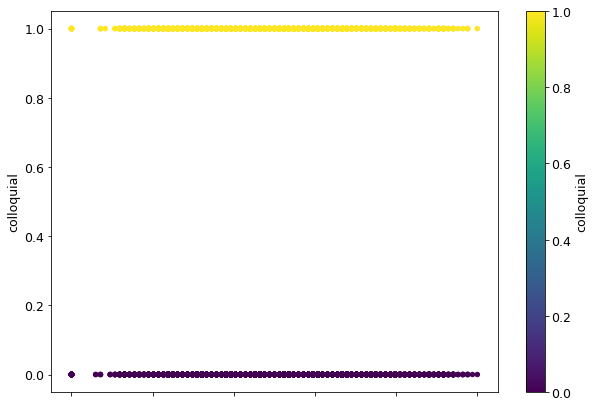

In [135]:
ax2 = df_pre_reg2.plot.scatter(x = 'age',
                      y='colloquial',
                      c='colloquial',
                      colormap='viridis')

## Logistic

In [152]:
X_log = numpy_helper(df_feat_os2, cols2)

#Create Y
y_log = df_score2.to_numpy()

#Split the dataset
X_train3, X_test3, y_train3, y_test3 = train_test_split(X_log, y_log, test_size = 0.3, train_size = 0.7, random_state = 123)

clf = LogisticRegression(random_state=0).fit(X_train3, y_train3)
y_predict3 = clf.predict(X_test3)
clf.predict_proba(X_test3)
clf.score(X_test3, y_test3)


0.717570093457944